<a href="https://colab.research.google.com/github/roscibely/Huawei-HCIA/blob/main/tree/main/Python_Programming_Basics/TensorFlow_Programming_Basics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Programming Basics

In [27]:
#TF version 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

hello=tf.constant('Hello, Tensorflow!') #Define a constant

sess=tf.Session() #Creat a session
print(sess.run(hello)) #run the comand to get the result
sess.close()

b'Hello, Tensorflow!'


In [9]:
#TF version 2 
import tensorflow as tf

hello = tf.constant('Hello, TensorFlow!')
tf.print(hello)

<tf.Operation 'PrintV2_2' type=PrintV2>

In [23]:
import tensorflow.compat.v1 as tf

a=tf.constant(3)
b=tf.constant(4) 

with tf.Session() as sess:
  print("Add: %i" %sess.run(a+b))
  print("Multiply: %i" %sess.run(a*b))
sess.close()

Add: 7
Multiply: 12


# Creating matrix variable

In [30]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

sess=tf.InteractiveSession()

#Create two matrix variable w1 and w2 
w1 = tf.Variable(tf.random_normal([2,3],mean=1.0,stddev=1.0))
w2 = tf.Variable(tf.random_normal([3,1],mean=1.0,stddev=1.0))

x=tf.constant([[0.7,0.9]])

tf.global_variables_initializer().run()

a=tf.matmul(x,w1) #multiply matrixes x*w1
y=tf.matmul(a,w2)
print(y.eval())

sess.close()

[[2.8160675]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


# Visualization of TensorBoard 

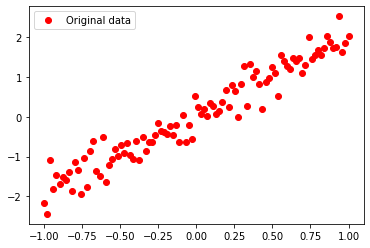

In [38]:
import tensorflow.compat.v1 as tf 
import numpy as np
import matplotlib.pyplot as plt

plotdata={"batchsize":[], "loss":[]}

def moving_average(a,w=10):
  if len(a)<w:
    return a[:]
  return [val if idx<w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


#Generating Analog data 
train_X=np.linspace(-1,1,100)
train_Y=2*train_X+np.random.randn(*train_X.shape)*0.3 #y=2x with noise

#Display the graph 
plt.plot(train_X,train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

tf.reset_default_graph()

In [39]:
#Creat a model 

#Placeholders 
X=tf.placeholder("float")
Y=tf.placeholder("float")

#Model parameters 
W=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.zeros([1]), name="bias")

#Creating a forward struture 
z=tf.multiply(X,W) + b #z=x*W +b
tf.summary.histogram('z',z) #Display predicted values in a histogram



<tf.Tensor 'z:0' shape=() dtype=string>

In [41]:
#Reverse Optimization 
cost=tf.reduce_mean(tf.square(Y-z))
tf.summary.scalar('loss_function', cost)
learning_rate=0.01
#Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [42]:
#Initialize variables

init=tf.global_variables_initializer()

#Set parameters
training_epochs=20
display_step=2

Epoch: 1 cost: 0.13412409
Epoch: 3 cost: 0.0943047
Epoch: 5 cost: 0.0914513
Epoch: 7 cost: 0.09141066
Epoch: 9 cost: 0.09144772
Epoch: 11 cost: 0.091460474
Epoch: 13 cost: 0.091463976
Epoch: 15 cost: 0.0914649
Epoch: 17 cost: 0.09146514
Epoch: 19 cost: 0.09146521
Finished!
cost: 0.09146524


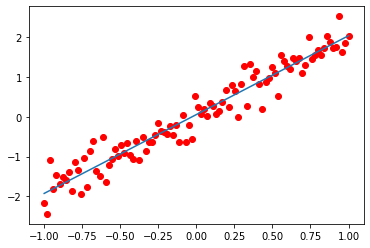

In [46]:
#Starting a session 

with tf.Session() as sess:
  sess.run(init)
#Merge all sumaries 
  merged_summary_op=tf.summary.merge_all()
  summary_writer=tf.summary.FileWriter('log/mnist_with_summaries',sess.graph)
  #Write data to the model 
  for epoch in range(training_epochs):
    for (x,y) in zip(train_X,train_Y):
      sess.run(optimizer,feed_dict={X:x,Y:y})
      #Generate summary 
      summary_str=sess.run(merged_summary_op,feed_dict={X:x,Y:y})
      summary_writer.add_summary(summary_str,epoch)
    if epoch % display_step==0:
      loss=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
      print("Epoch:", epoch+1, "cost:", loss)
      if not(loss=="NA"):
        plotdata["batchsize"].append(epoch)
        plotdata["loss"].append(loss)

  print("Finished!")
  plt.plot(train_X,train_Y,'ro',label='Original data')
  plt.plot(train_X,sess.run(W)*train_X+sess.run(b), label='Fitted line')
  print("cost:", cost.eval({X:train_X,Y:train_Y}))

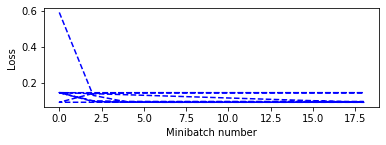

In [52]:
plotdata["avgloss"]=moving_average(plotdata["loss"])
plt.figure(1)
plt.subplot(211)
plt.plot(plotdata["batchsize"],plotdata["avgloss"], 'b--')
plt.xlabel('Minibatch number')
plt.ylabel('Loss')

plt.show()